# Principle Component Analysis

## Importing the required modules

In [7]:
from math import sqrt
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from prep import dedup, norm, reduce
from util import tsplit, read_train_test
from regr import linreg, knnreg, treereg, randreg, adareg, svmreg, votreg, xgbreg
from hypopt import knnhyp, treehyp, randhyp, adahyp, svmhyp, xgbhyp

## Registering the start time for runtime calculation

In [8]:
start = time.time()

## Read the tidy training and test datasets from file

In [9]:
x_train, x_test, y_train, y_test = read_train_test('../data/sup_norm_tr.csv', '../data/sup_norm_te.csv')

## Perform the principal components fit on the training data only

Set the parameter n_components to cut off the components beyond some threshold

If n_components is a float between 0 and 1 it represents the conserved fraction of variance instead

In [10]:
comp_it = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,0.999,0.9995, 0.9999, 0.99995, 0.99999, 0.999995, 0.999999, 0.9999995, 0.999999999999]
cpca = []

for comp_i in comp_it:
    pca = PCA(n_components=comp_i)
    pca.fit(x_train)
    pc_train = pca.transform(x_train)
    pc_train = pd.DataFrame(data = pc_train)
    cpca.append(len(pc_train.columns))
    

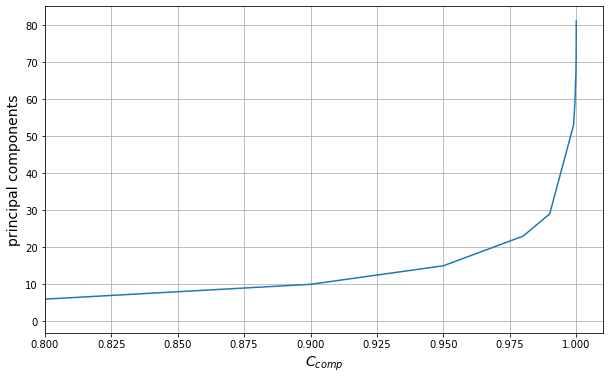

In [11]:
fig = plt.figure(figsize=(10,6))
plt.plot(comp_it, cpca)
plt.xlabel("$C_{comp}$", fontdict={'fontsize': 14})
plt.ylabel("principal components", fontdict={'fontsize': 14})
plt.grid()
plt.xlim(0.8, 1.01)
fig.savefig('../graph/Pca_Ccomp.jpg')

In [12]:
pca = PCA(n_components=0.93)
pca.fit(x_train)

PCA(n_components=0.93)

## Perform the principal components transformation on the training data

Also convert into a pandas DataFrame

In [13]:
cl_raw = x_train.columns
pc_train = pca.transform(x_train)
x_train = pd.DataFrame(data = pc_train)

Display the transformed training data

In [14]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.896195,-0.015876,-0.270927,-0.198361,0.062224,0.228228,0.118170,-0.533375,-0.461641,0.140649,-0.277067,-0.131977,-0.081790
1,-0.780332,0.424544,-0.040609,-0.041486,-0.033572,-0.111615,-0.172380,0.023606,0.038086,0.196624,-0.092315,0.096231,0.118700
2,-0.758158,0.752905,0.050603,-0.005878,0.003749,0.091433,-0.056957,-0.153497,0.119987,0.212114,-0.014812,-0.031164,-0.050200
3,-1.017140,0.437589,-0.135337,-0.026496,-0.000379,-0.064553,-0.111885,-0.147752,0.032231,-0.105640,-0.011160,-0.066429,-0.058902
4,1.580039,0.013323,-0.001617,-0.386295,-0.069023,-0.273391,-0.253565,0.217485,0.336876,0.005695,-0.150781,0.010899,-0.244618
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15942,-1.036882,0.310589,-0.120956,0.047407,0.173159,0.067191,-0.096902,-0.079107,0.092460,0.034410,0.012183,-0.009441,-0.058271
15943,-0.773886,0.122474,0.025354,0.481739,-0.134880,0.142872,0.040939,0.206413,-0.238762,-0.168231,-0.012286,0.266339,0.141463
15944,-1.004656,0.375373,-0.095150,-0.011334,-0.053575,-0.129310,-0.063861,-0.039410,-0.009068,-0.174378,0.033776,-0.135111,-0.055117
15945,-1.057760,0.263415,-0.115574,-0.248689,0.040601,-0.215833,-0.203120,-0.103528,0.064457,0.041175,-0.079219,-0.086941,0.026455


## Check the sum of principal component variances (should be slightly above threshold)

In [15]:
pca.explained_variance_ratio_.sum()

0.936532676773587

## Display mapping matrix of principal components

In [16]:
pcs_train = pd.DataFrame(data=pca.components_.reshape(len(x_train.columns),-1), columns=cl_raw)
pcs_train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.144069,0.031675,0.076826,0.058680,0.102528,-0.138547,-0.163625,-0.173101,0.053946,-0.104636,...,0.124081,0.147300,0.124397,0.146428,-0.150235,-0.155841,-0.018964,0.076174,-0.000432,0.009432
1,-0.109300,-0.042274,-0.077469,-0.022339,-0.061392,-0.108817,-0.097717,-0.159672,-0.038269,-0.119667,...,-0.102695,-0.116855,-0.081116,-0.097013,-0.103479,-0.135197,-0.255753,-0.028013,-0.177826,-0.187101
2,-0.044378,-0.231517,-0.228926,-0.239111,-0.231394,-0.081371,-0.045821,-0.079942,-0.108688,-0.051246,...,-0.054789,-0.026256,-0.073921,-0.039668,-0.047747,-0.034190,0.130014,-0.019724,0.099486,0.091797
3,-0.084703,0.142058,0.115240,0.072916,0.051534,-0.135690,-0.095309,0.274411,0.095959,0.273802,...,0.102055,0.119583,0.087371,0.110614,-0.084979,-0.064058,0.084031,0.047931,0.087018,0.065907
4,-0.006193,-0.034482,-0.064823,-0.068060,-0.078618,-0.032750,-0.030532,0.114023,0.013627,0.114989,...,0.007421,-0.003238,0.030736,0.017590,0.019978,-0.016939,-0.171406,0.043185,-0.119593,-0.130966
5,-0.058526,-0.000038,0.001801,-0.070473,-0.053951,-0.162879,-0.050950,0.264164,-0.047048,0.244245,...,-0.154278,-0.202629,-0.142621,-0.202204,-0.081829,0.041716,-0.142974,-0.235982,-0.120133,-0.037823
6,-0.053768,-0.110293,0.046169,-0.090202,0.058557,-0.069796,-0.038915,-0.128109,-0.047475,-0.099869,...,0.024481,0.029605,0.008952,0.011624,-0.070971,0.099966,0.115696,-0.143719,0.099713,0.138880
7,0.010679,-0.114814,-0.070220,-0.125679,-0.069706,0.000963,-0.126763,0.049430,0.131463,0.038683,...,-0.124670,-0.094350,-0.180278,-0.129315,-0.029951,-0.135655,0.440662,0.179051,0.373026,0.265703
8,0.049349,0.040188,0.198984,0.030190,0.194284,0.051703,-0.134125,0.015109,0.287765,0.018038,...,-0.145857,-0.060062,-0.135883,-0.052929,0.078153,-0.022160,-0.108130,0.138081,-0.110241,-0.099453
9,0.038518,-0.127078,-0.067655,-0.090468,-0.038691,0.031659,-0.016215,-0.093897,0.033023,-0.088554,...,-0.077007,-0.078363,-0.054748,-0.061523,0.048356,-0.002887,-0.222502,0.009297,-0.209512,-0.181579


## Heatmap of PCA mapping matrix

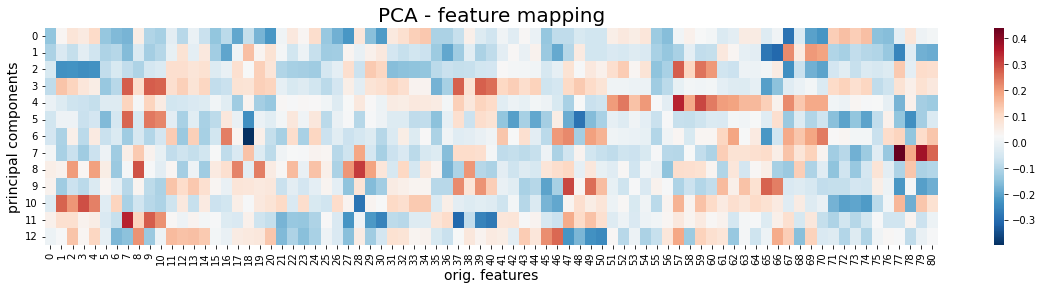

In [17]:
colnum = list(range(0,len(pcs_train.columns)))

fig = plt.figure(figsize=(20,4))
ax = sns.heatmap(pcs_train, cmap='RdBu_r', annot=False)
ax.set_title("PCA - feature mapping", fontdict={'fontsize': 20})
ax.set_xticklabels(labels=colnum, rotation=90)
ax.set_yticklabels(labels=pcs_train.index, rotation=0)
ax.set_xlabel("orig. features", fontdict={'fontsize': 14})
ax.set_ylabel("principal components", fontdict={'fontsize': 14})
fig.savefig('../graph/Pca_mapping_heatmap.jpg')

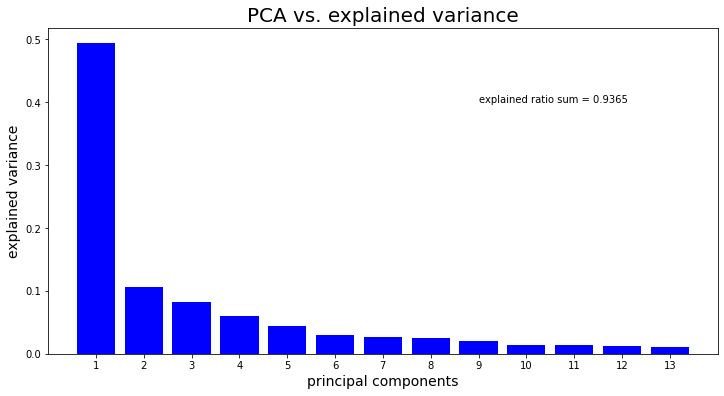

In [18]:
fig = plt.figure(figsize=(12,6))
plt.bar(pcs_train.index + 1, pca.explained_variance_ratio_, color = "blue")
plt.title("PCA vs. explained variance", fontdict={'fontsize': 20})
plt.xlim(0.0,14)
plt.xticks(list(range(1,14)))
plt.xlabel("principal components", fontdict={'fontsize': 14})
plt.ylabel("explained variance", fontdict={'fontsize': 14})
plt.annotate(f"explained ratio sum = {pca.explained_variance_ratio_.sum():.4f}", xy=(9,0.4), xycoords='data')
fig.savefig('../graph/Pca_explained_var.jpg')

## Heatmap of the correlation matrix of training after PCA

In [19]:
crmx_red = x_train.corr().abs()

<AxesSubplot:>

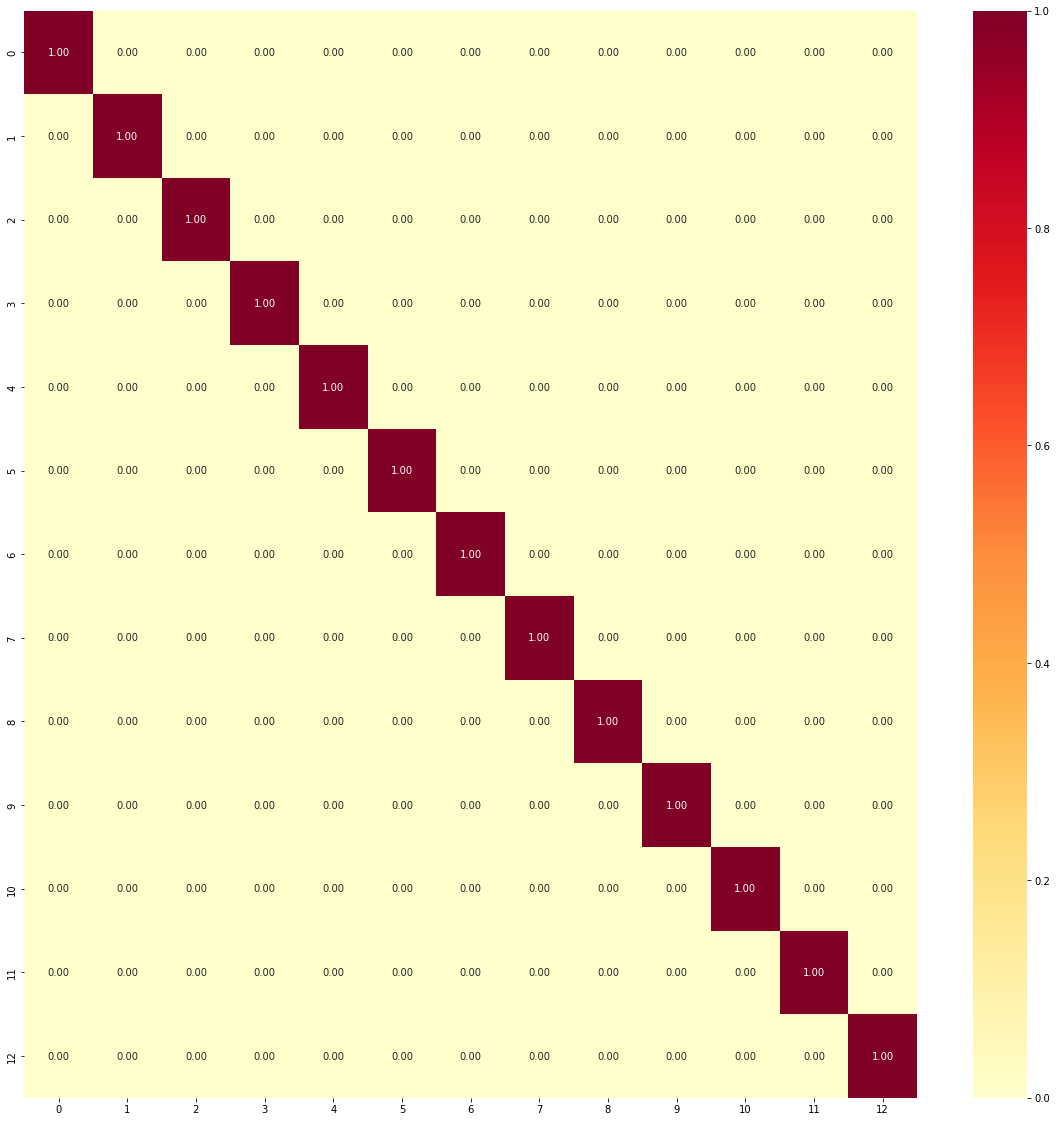

In [20]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(crmx_red, cmap='YlOrRd', annot=True, fmt='.2f')

## Perform the principal components transformation on the test data

In [21]:
pc_test = pca.transform(x_test)
x_test = pd.DataFrame(data = pc_test)

Display the transformed test data

In [22]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.734387,0.134171,1.143145,-0.292907,0.720442,-0.270200,0.055008,-0.340889,0.285476,-0.038201,-0.002746,0.155038,0.008471
1,0.797601,-0.474823,-0.069724,-0.193080,-0.414784,-0.499220,0.189830,-0.048836,-0.123139,-0.029768,-0.221647,0.276531,-0.163220
2,-1.178795,-0.333908,-0.206736,0.017399,-0.000076,0.001571,-0.193423,0.128784,-0.328496,0.014121,0.047119,0.186357,-0.026036
3,-0.981305,0.417594,-0.098573,0.011647,-0.027935,-0.146378,-0.045134,-0.002100,0.022533,-0.178525,0.021990,-0.149032,-0.060627
4,1.230812,0.129706,-0.022062,-0.651062,0.111082,-0.116603,-0.073172,0.446678,-0.103073,-0.111093,-0.393012,0.035928,0.089077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,0.388483,-0.423547,0.020954,-0.485852,-0.002612,0.053274,-0.120252,0.202382,-0.076949,-0.026432,0.072342,-0.090755,-0.075603
5312,1.739037,0.509618,-0.475234,-0.575471,-0.292864,0.401173,-0.144388,-0.081273,0.254465,-0.088802,0.143260,0.130288,0.071772
5313,1.741772,0.327604,0.008038,-0.223226,-0.173993,0.008671,-0.206123,-0.385165,0.225933,0.049623,-0.325301,-0.301590,0.040489
5314,0.865907,-0.579530,-0.511899,-0.473566,-0.116701,0.020616,-0.323377,-0.249283,0.246498,0.045803,0.052255,-0.090091,0.088133


## Aggregate x and y into one dataframe for training and test each

In [23]:
train = x_train.assign(critical_temp=y_train)
test = x_test.assign(critical_temp=y_test)

## Export resulting dataframes into csv files

In [24]:
train.to_csv('../data/sup_pca_tr.csv', index=False)
test.to_csv('../data/sup_pca_te.csv', index=False)

In [25]:
end = time.time()
runtime = end - start
print(f"Runtime = {runtime:.2f} s")

Runtime = 11.30 s
